## Step 1: Imports

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FileUpload
import io
import tempfile

## Step 2: Upload audio file

In [2]:
uploader = FileUpload(accept='.wav', multiple=False)
uploader

FileUpload(value=(), accept='.wav', description='Upload')

## Step 3: Read uploaded file into memory

In [3]:
# Extract uploaded file info
uploaded_file = uploader.value[0]
file_name = uploaded_file['name']
audio_bytes = uploaded_file['content']

print("Uploaded File:", file_name)

# Write bytes to a temporary WAV file for librosa
tmp = tempfile.NamedTemporaryFile(delete=False, suffix=".wav")
tmp.write(audio_bytes)
tmp.flush()

# Load audio with librosa (stereo preserved)
y, sr = librosa.load(tmp.name, sr=None, mono=False)

print("Original shape:", y.shape)
print("Original sample rate:", sr)

Uploaded File: 134__[vio][nod][cla]2156__3.wav
Original shape: (2, 132299)
Original sample rate: 44100


## Step 4: Convert to mono if stereo

In [4]:
if y.ndim == 2:
    print("Stereo detected → Converting to mono")
    y = librosa.to_mono(y)
else:
    print("Mono detected → Skipping conversion")

Stereo detected → Converting to mono


## Step 5: Resample to 16 kHz

In [5]:
target_sr = 16000

if sr != target_sr:
    print(f"Resampling from {sr} → {target_sr} Hz")
    y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    sr = target_sr
else:
    print("Already 16 kHz → Skipping resampling")

print("Final sample rate:", sr)
print("Final shape:", y.shape)

Resampling from 44100 → 16000 Hz
Final sample rate: 16000
Final shape: (48000,)


## Step 6: Generate Spectrogram

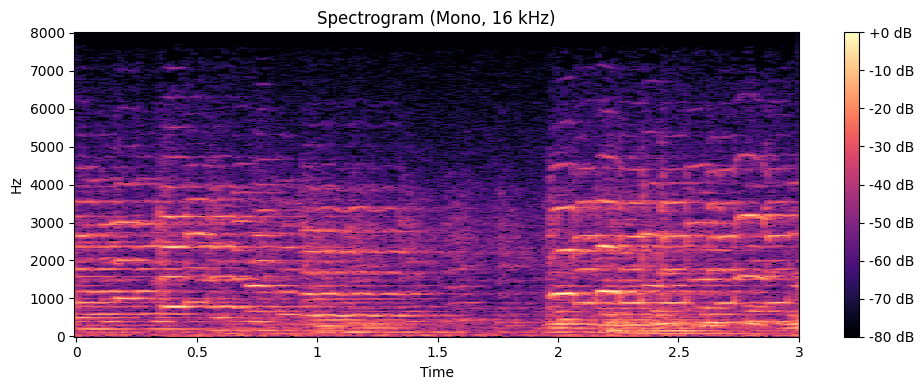

In [6]:
# Compute STFT
D = librosa.stft(y, n_fft=1024, hop_length=256)

# Convert to dB
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    S_db,
    sr=sr,
    hop_length=256,
    x_axis='time',
    y_axis='hz',
    cmap='magma'
)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Mono, 16 kHz)')
plt.tight_layout()
plt.show()